In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
from models.linear_regression import LinearRegression
from models.svr import SupportVectorRegression
from models.dnn_regression import DenseNeuralNetwork

Using TensorFlow backend.


In [6]:
from build_dataset import build_dataset

In [7]:
from train_models import SAVED_MODELS_DIR_MAP

In [8]:
stock_code = "GOOGL"

In [9]:
stock_prices = pd.read_csv("data/stock_prices/" + stock_code + ".csv", index_col=0).iloc[::-1]["adjusted_close"].values

In [10]:
models = DenseNeuralNetwork.get_all_models(stock_code, SAVED_MODELS_DIR_MAP[DenseNeuralNetwork.MODEL]) or []

In [11]:
errors = []

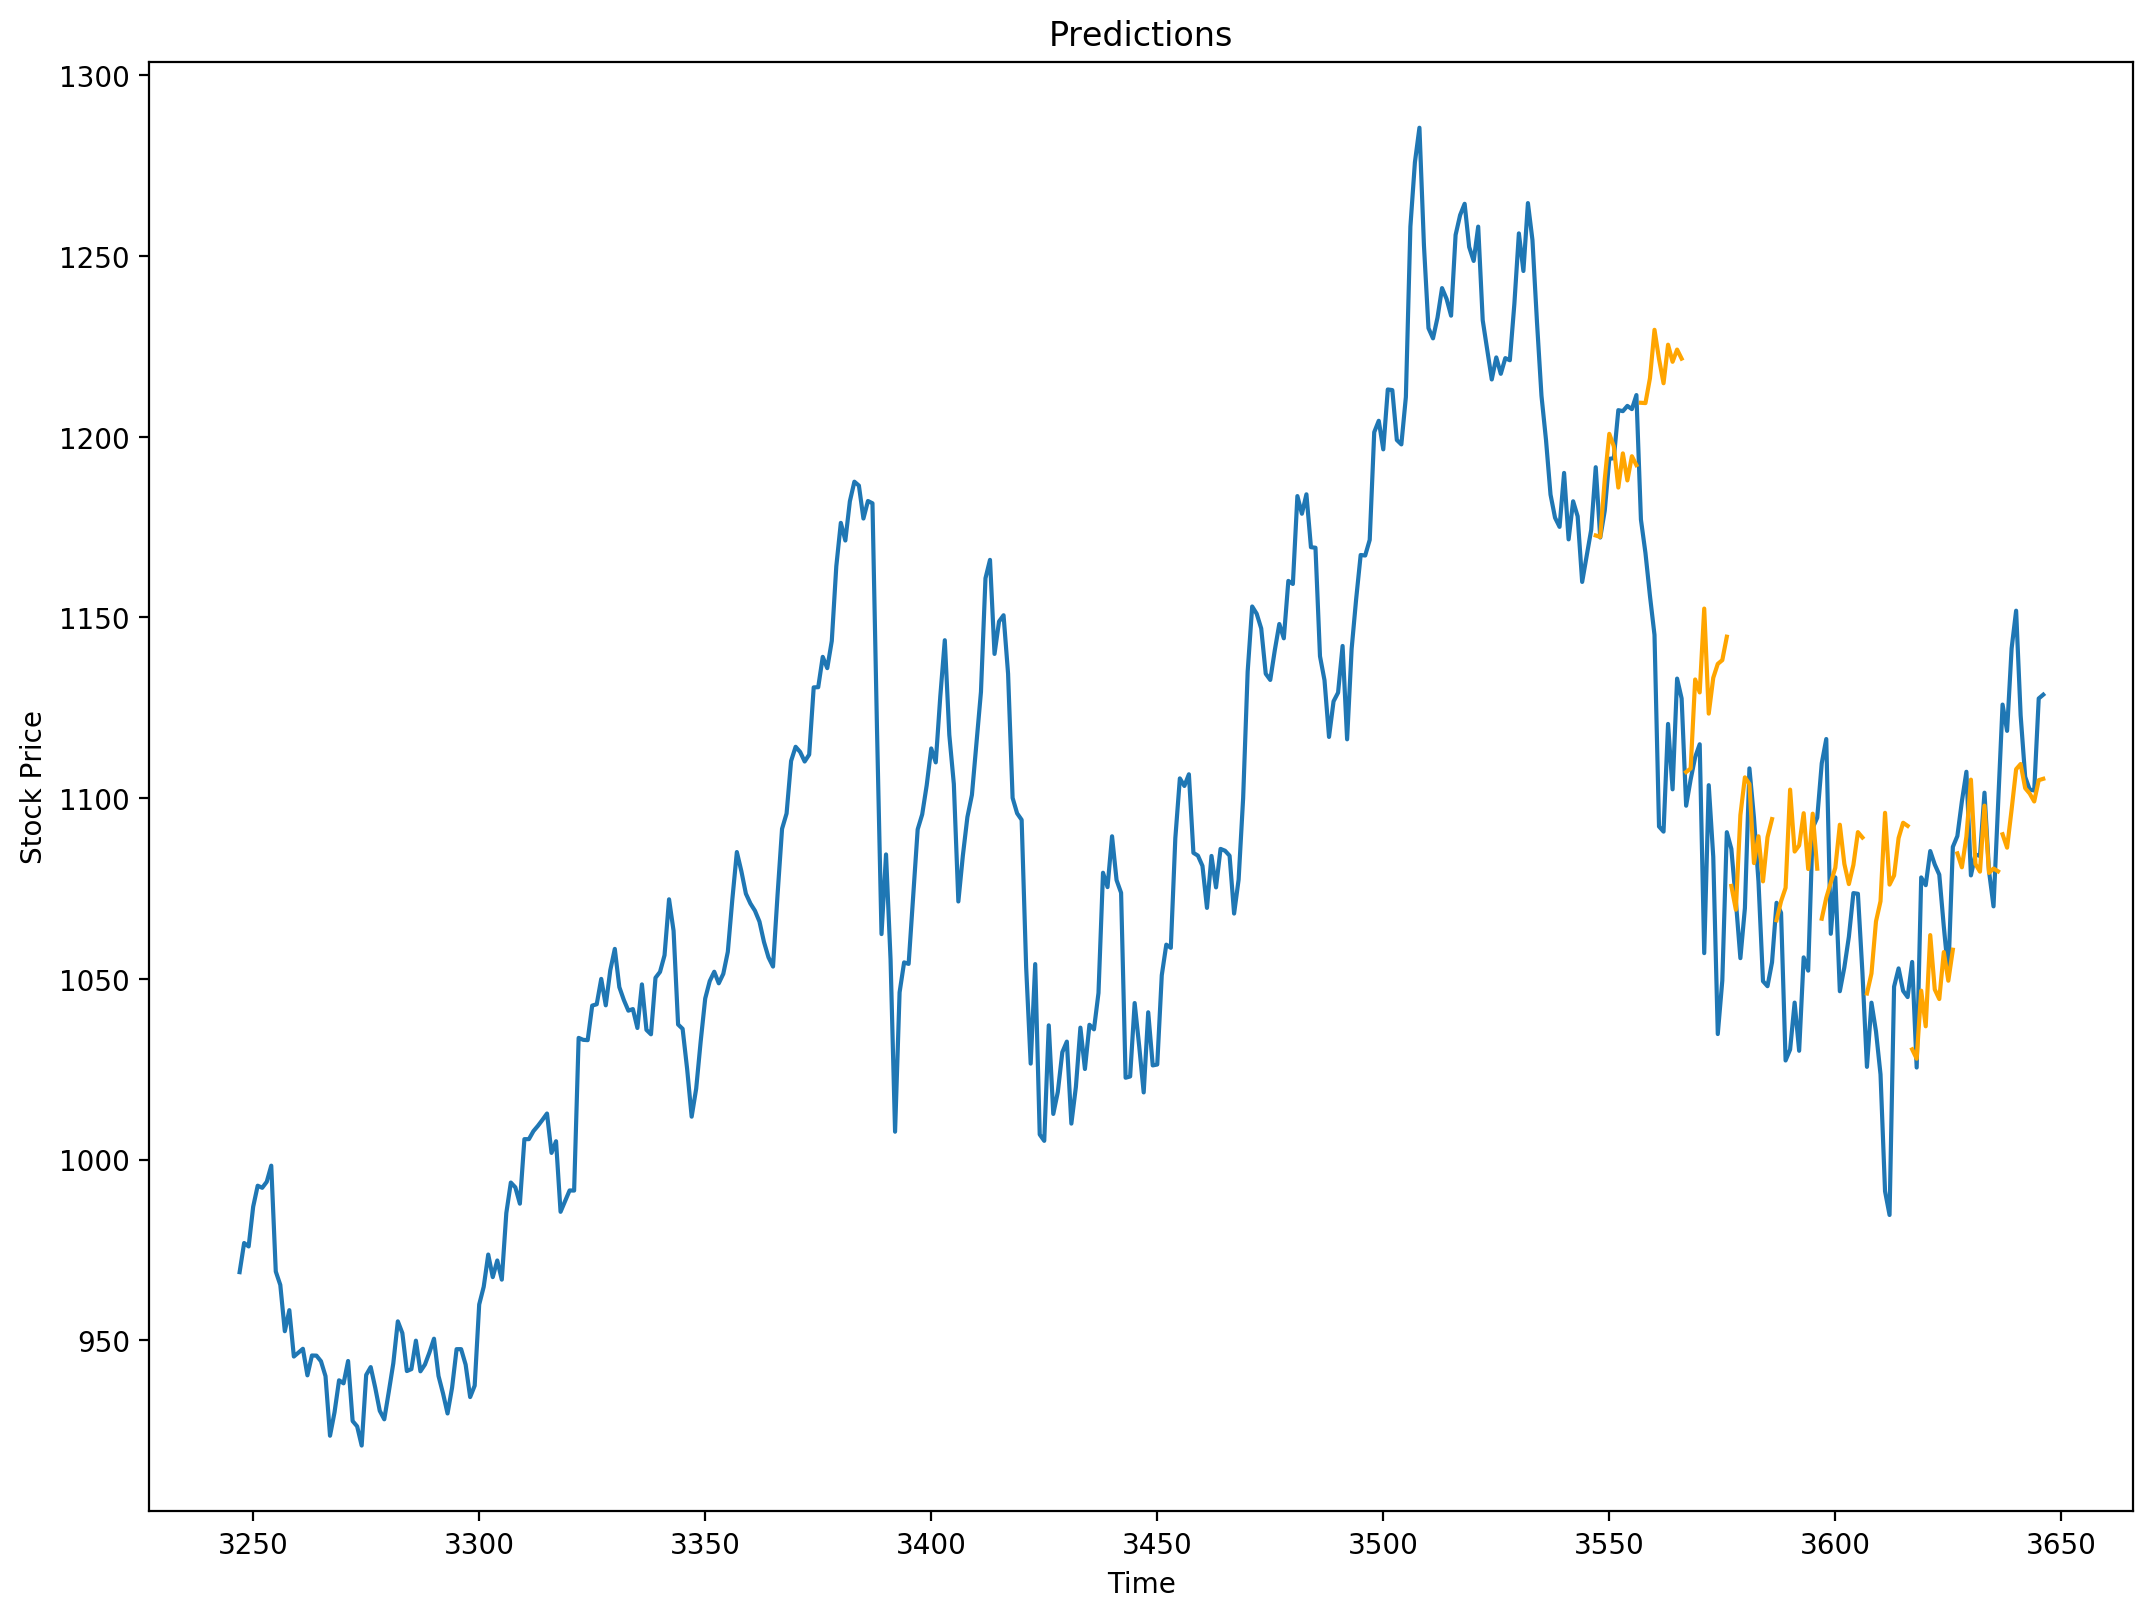

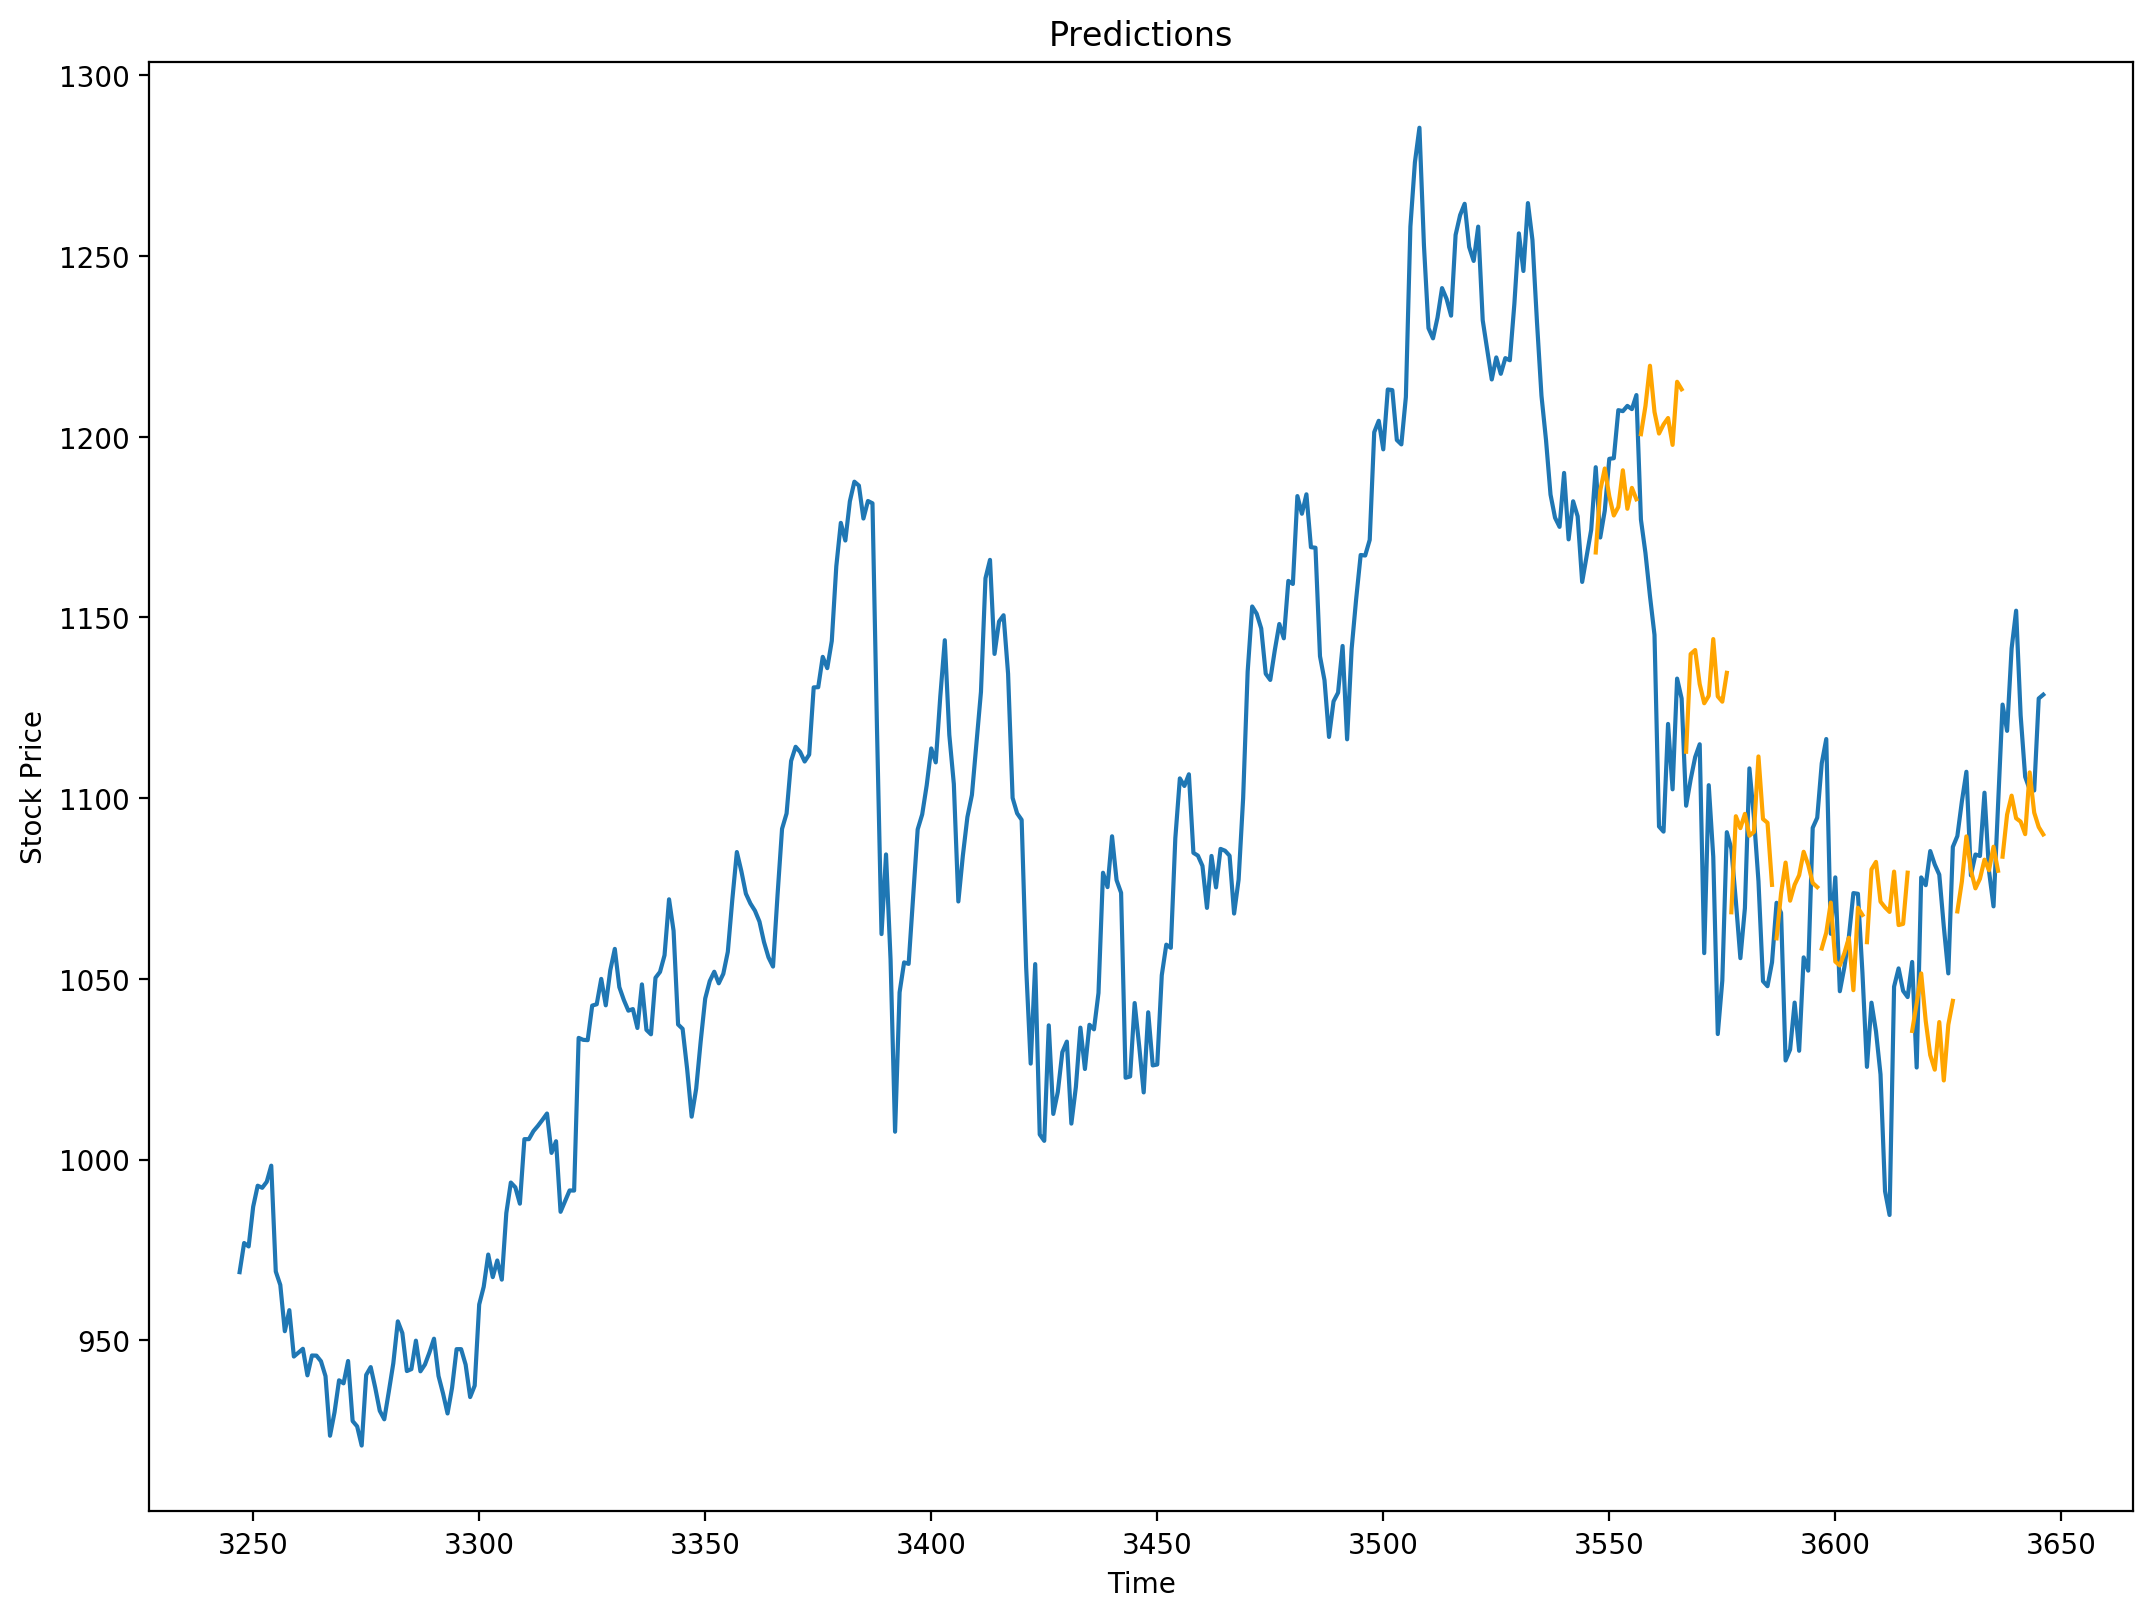

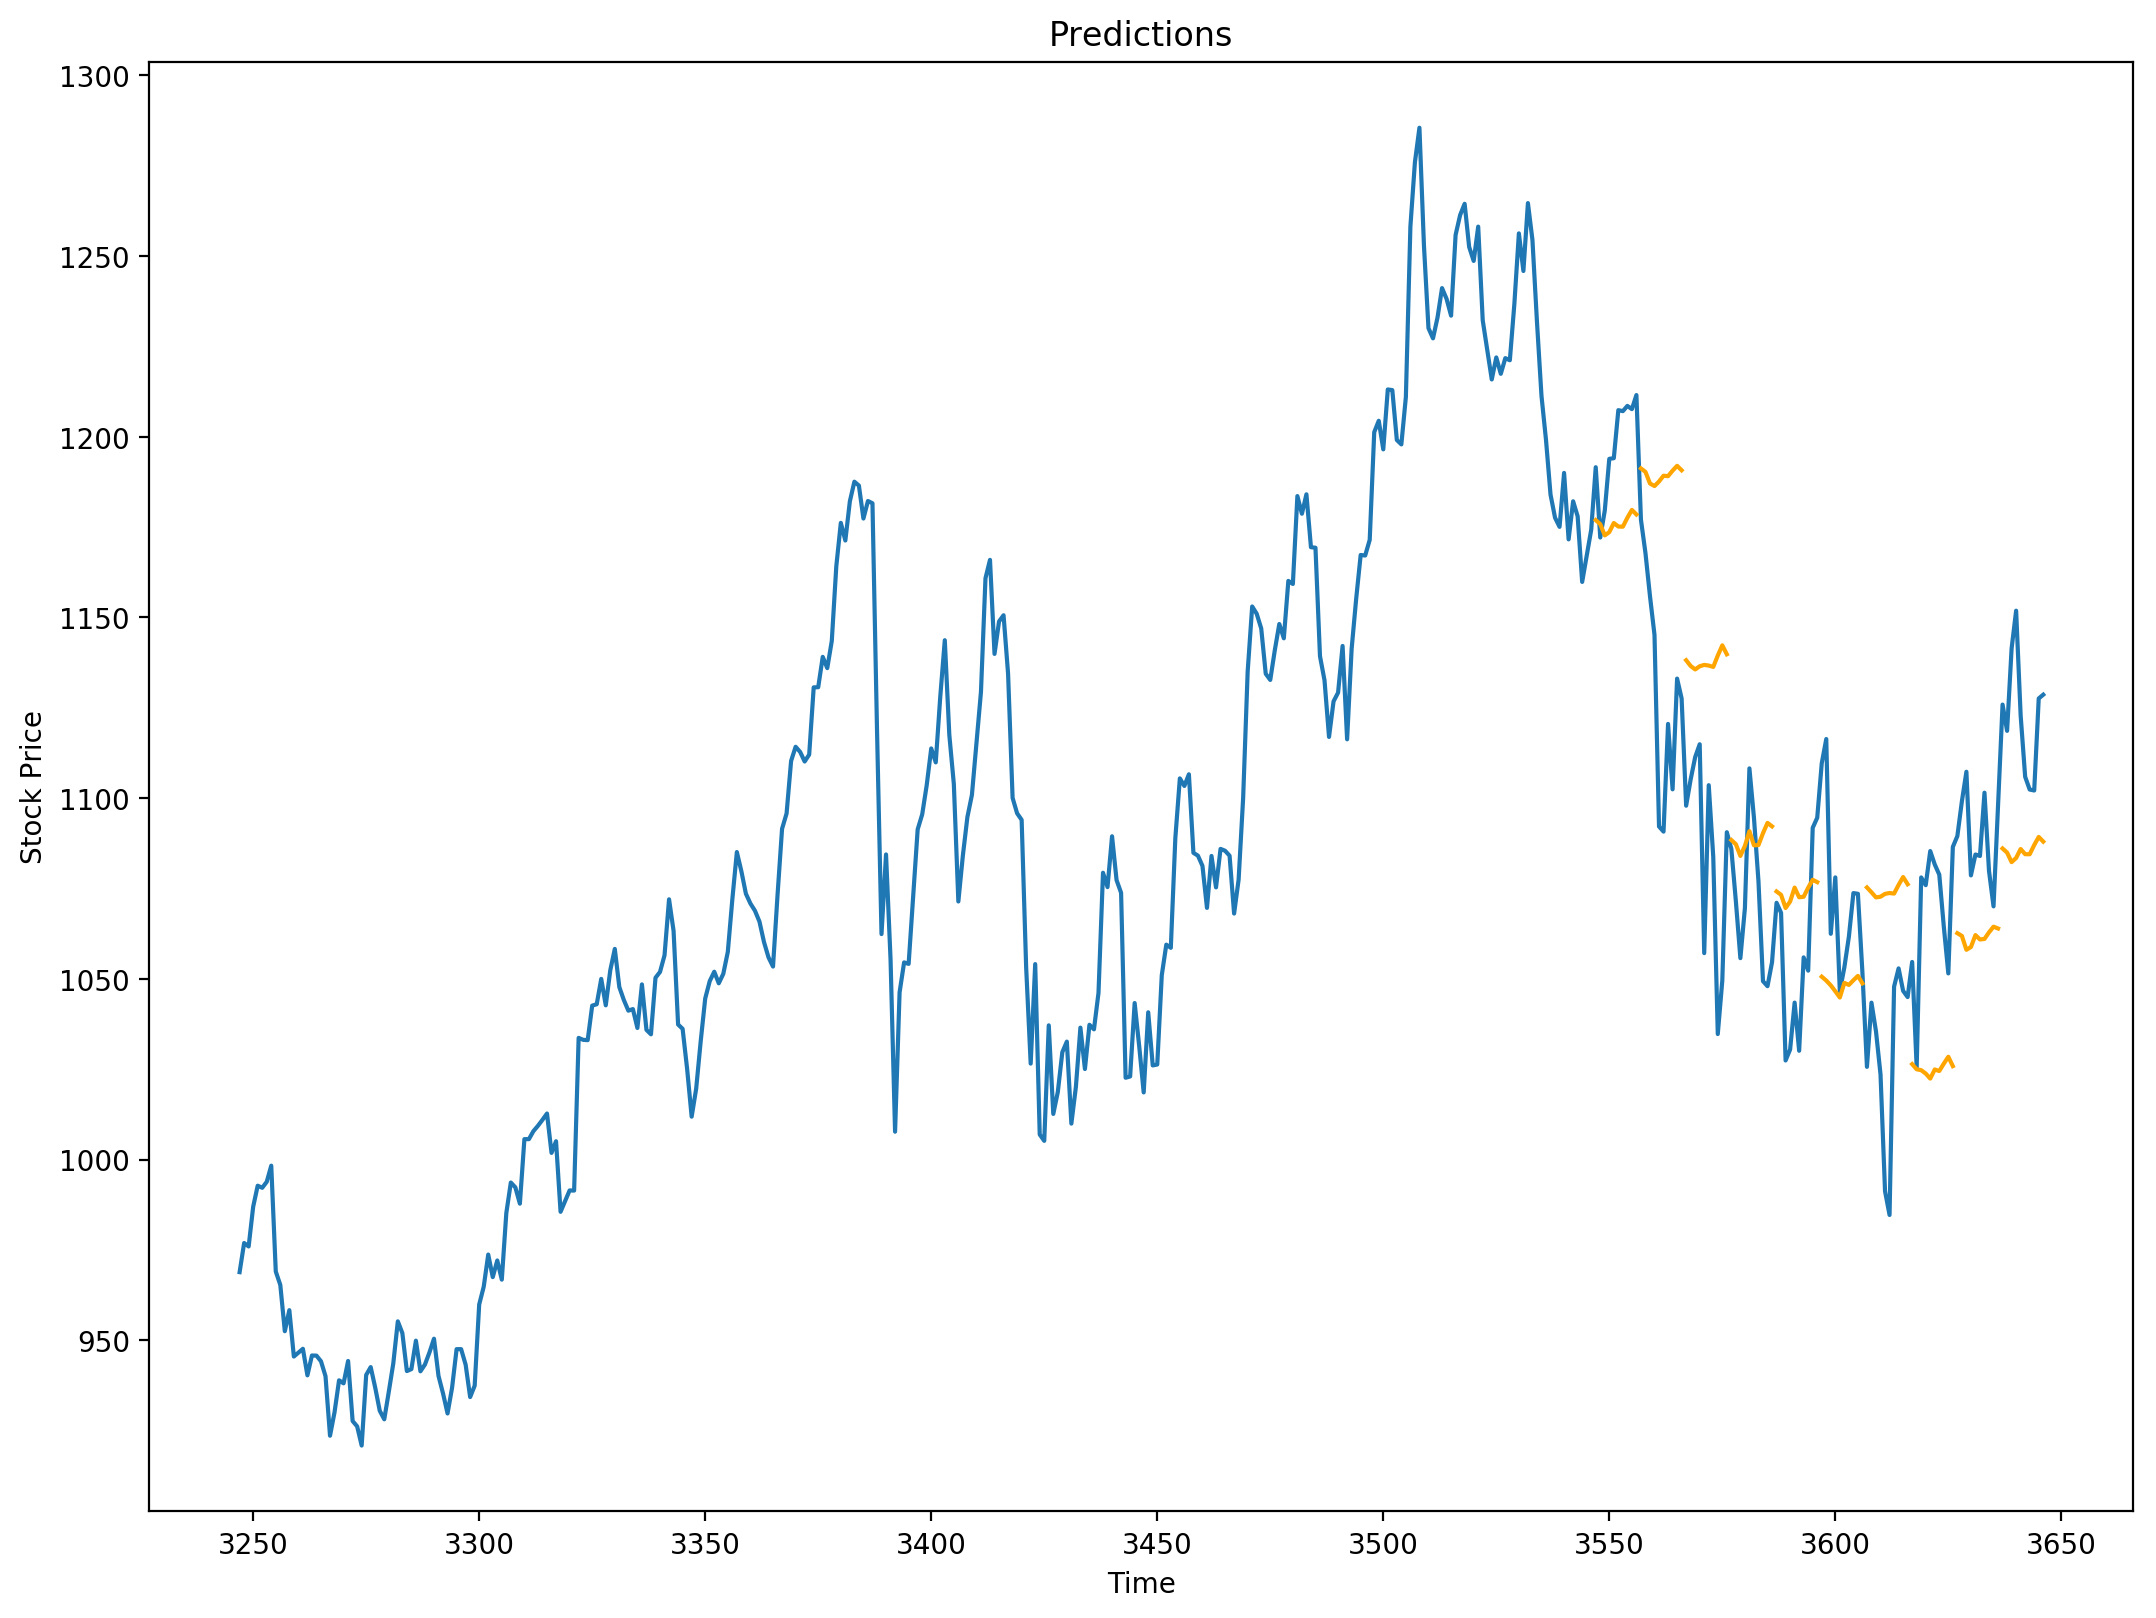

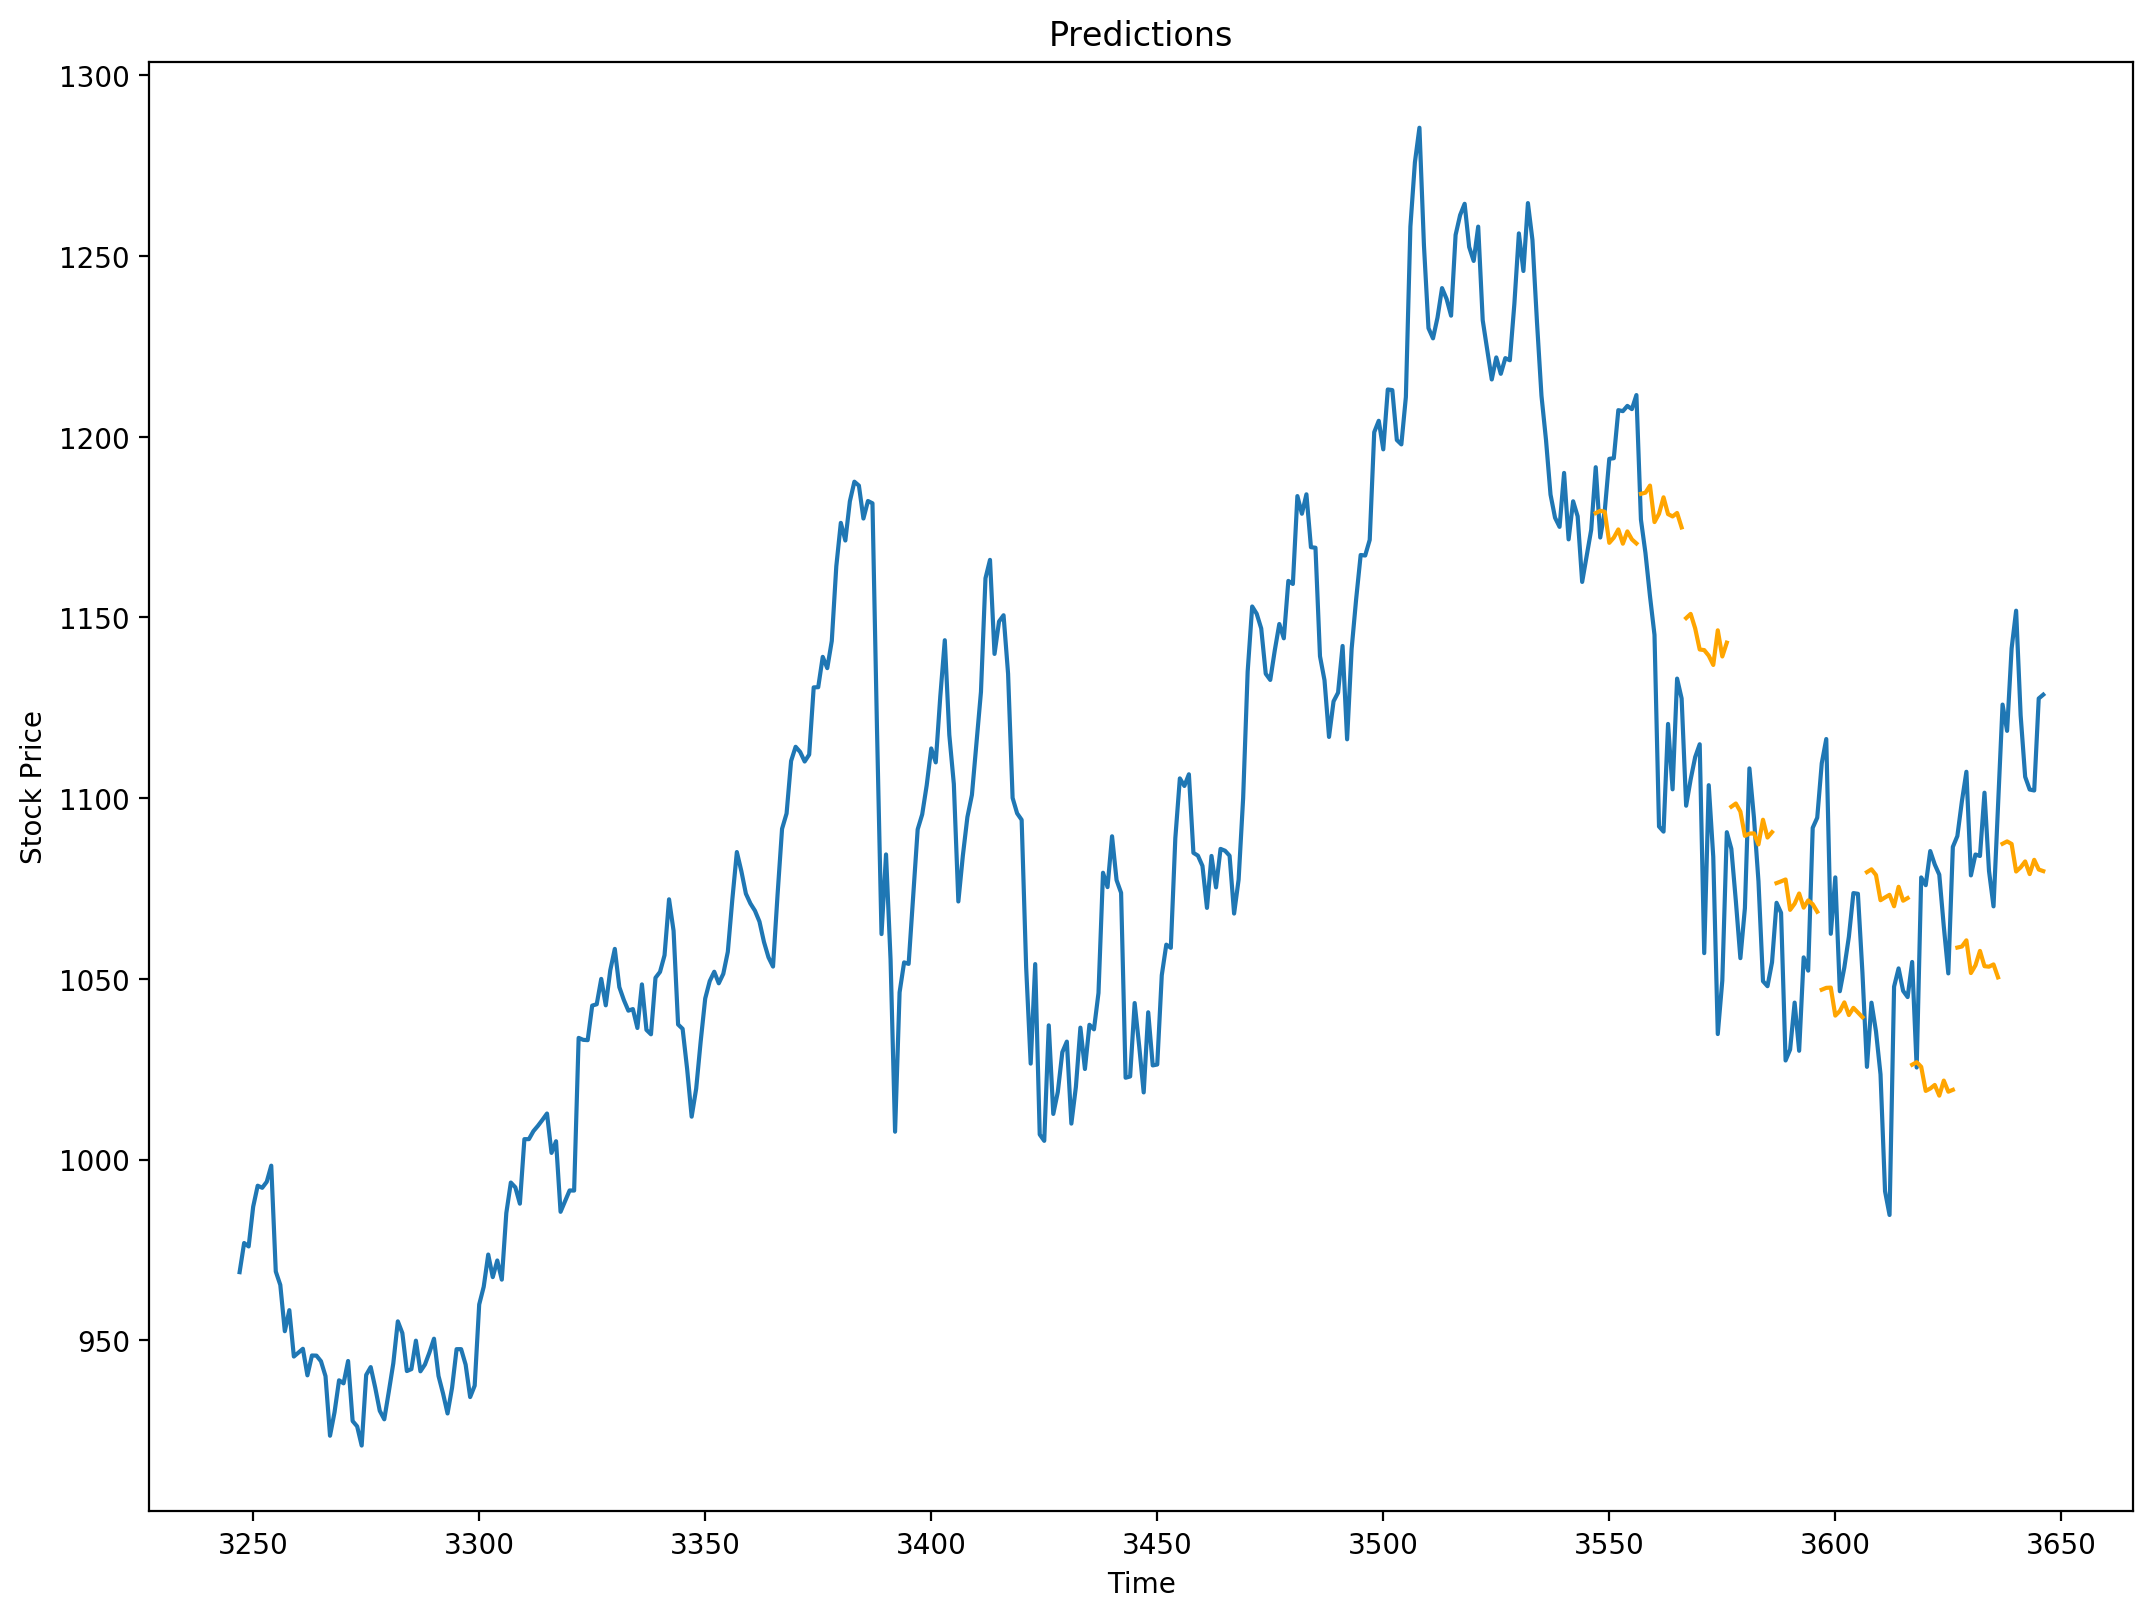

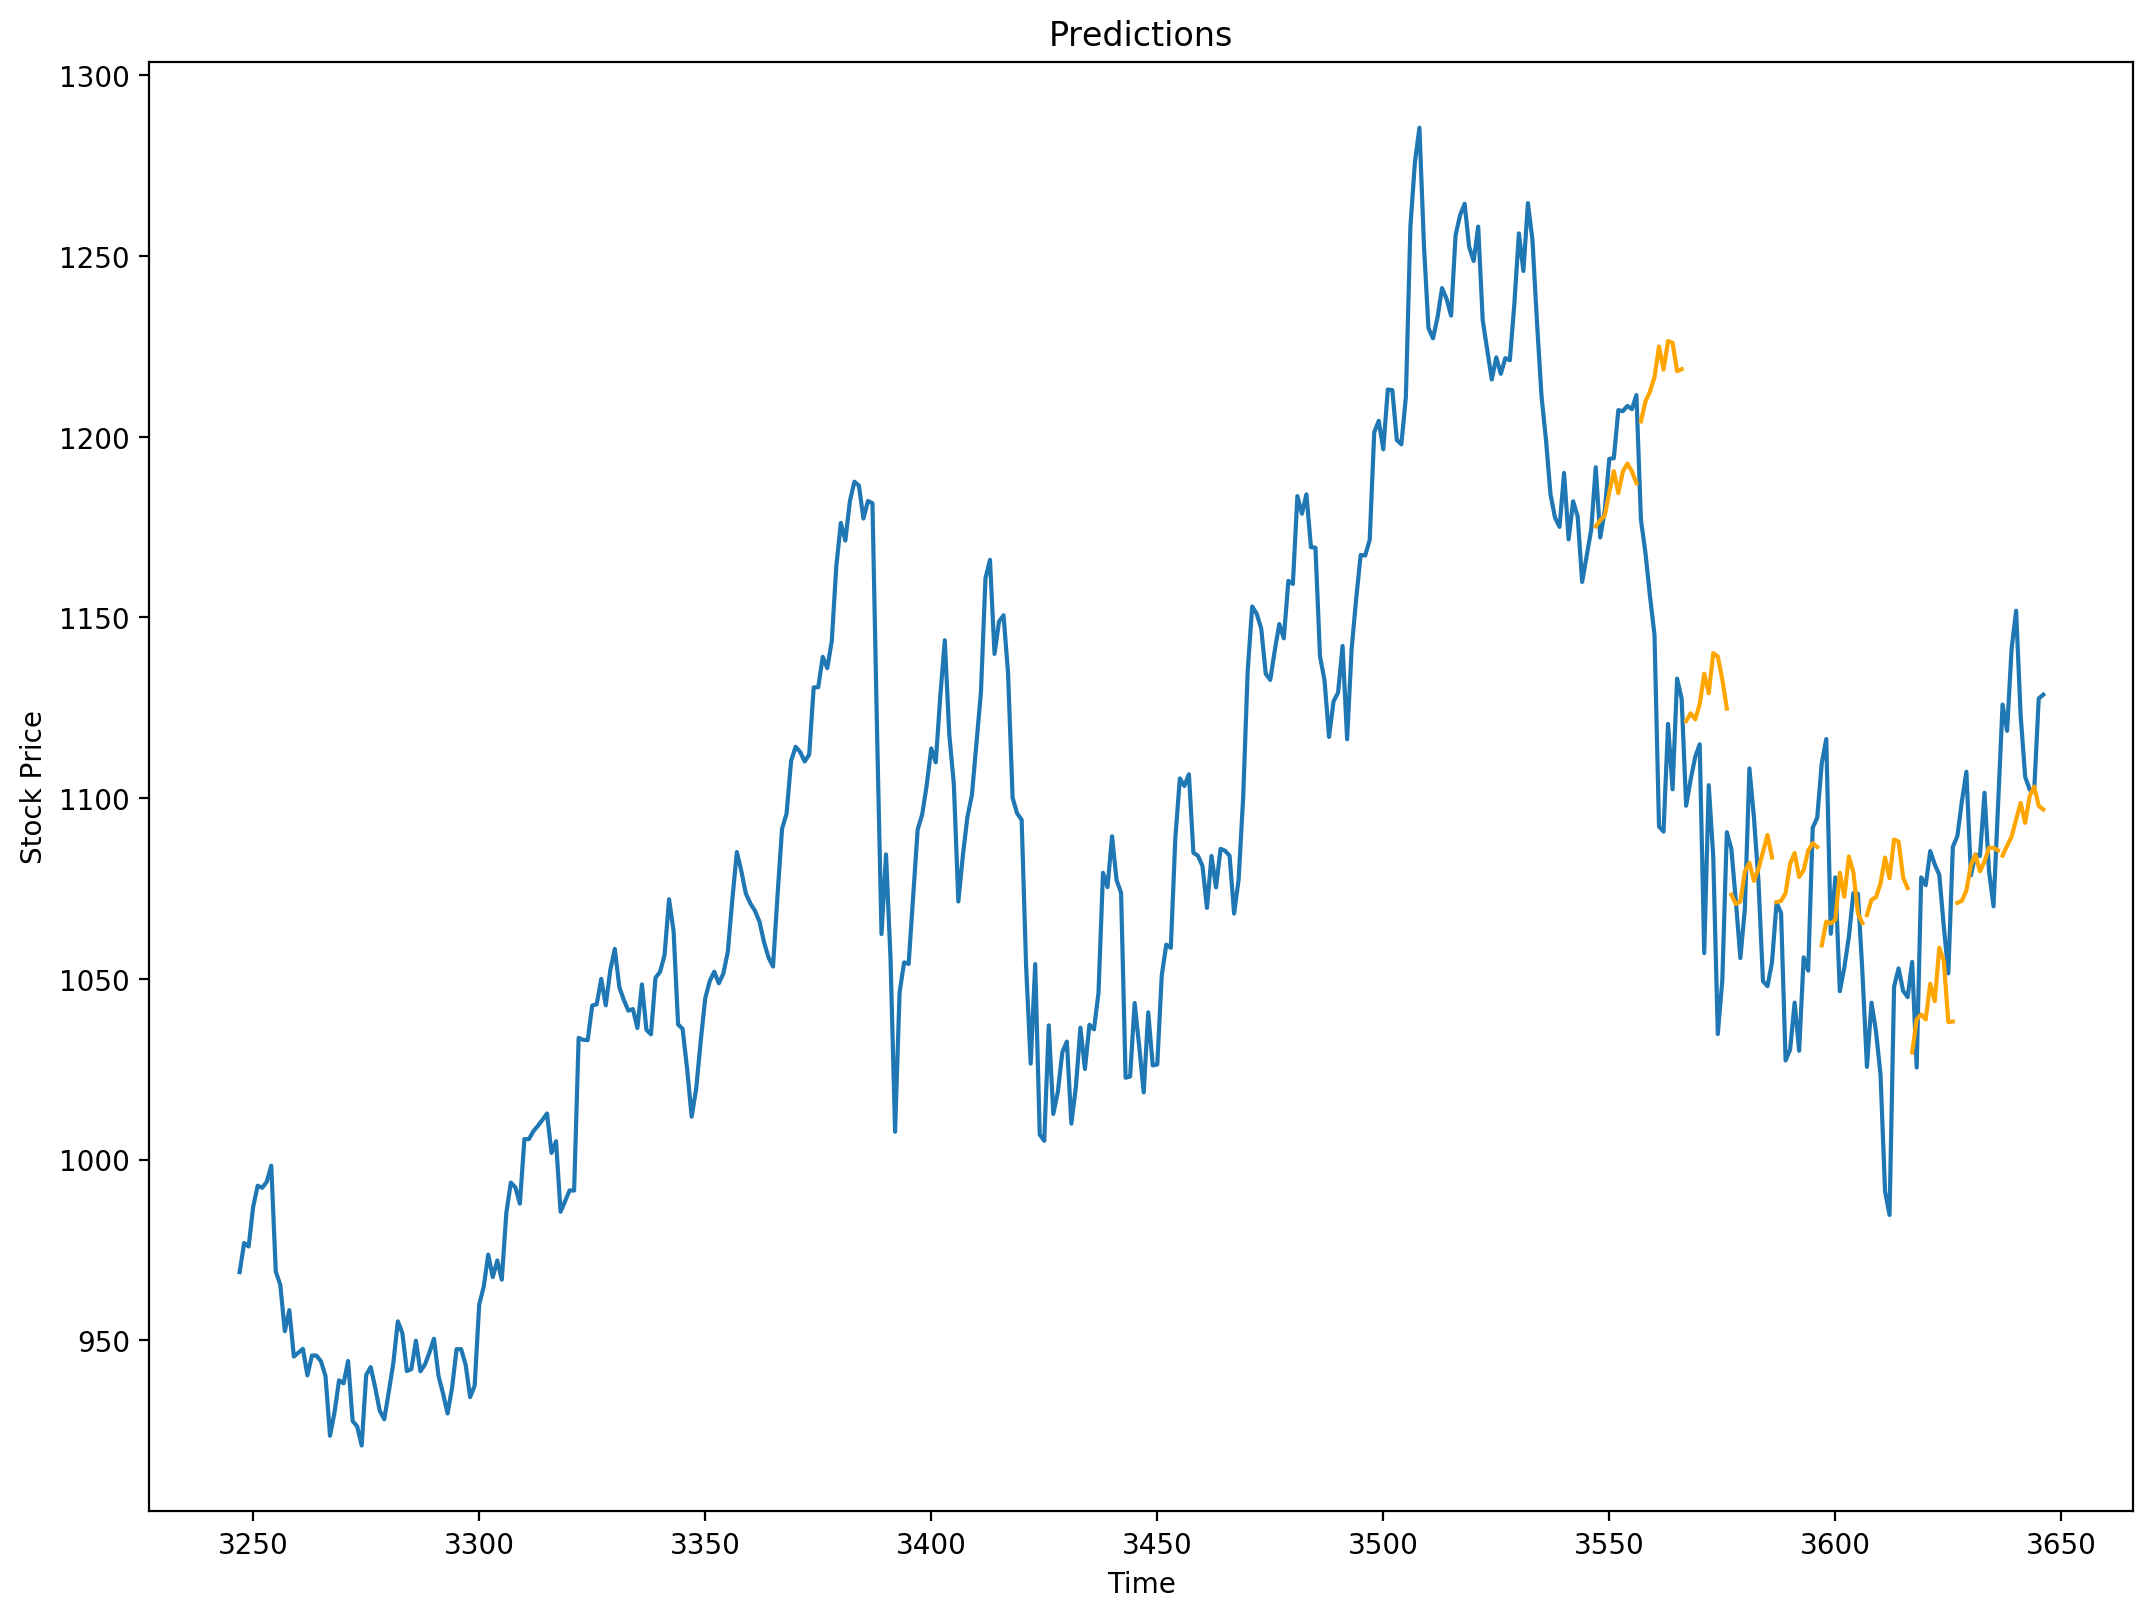

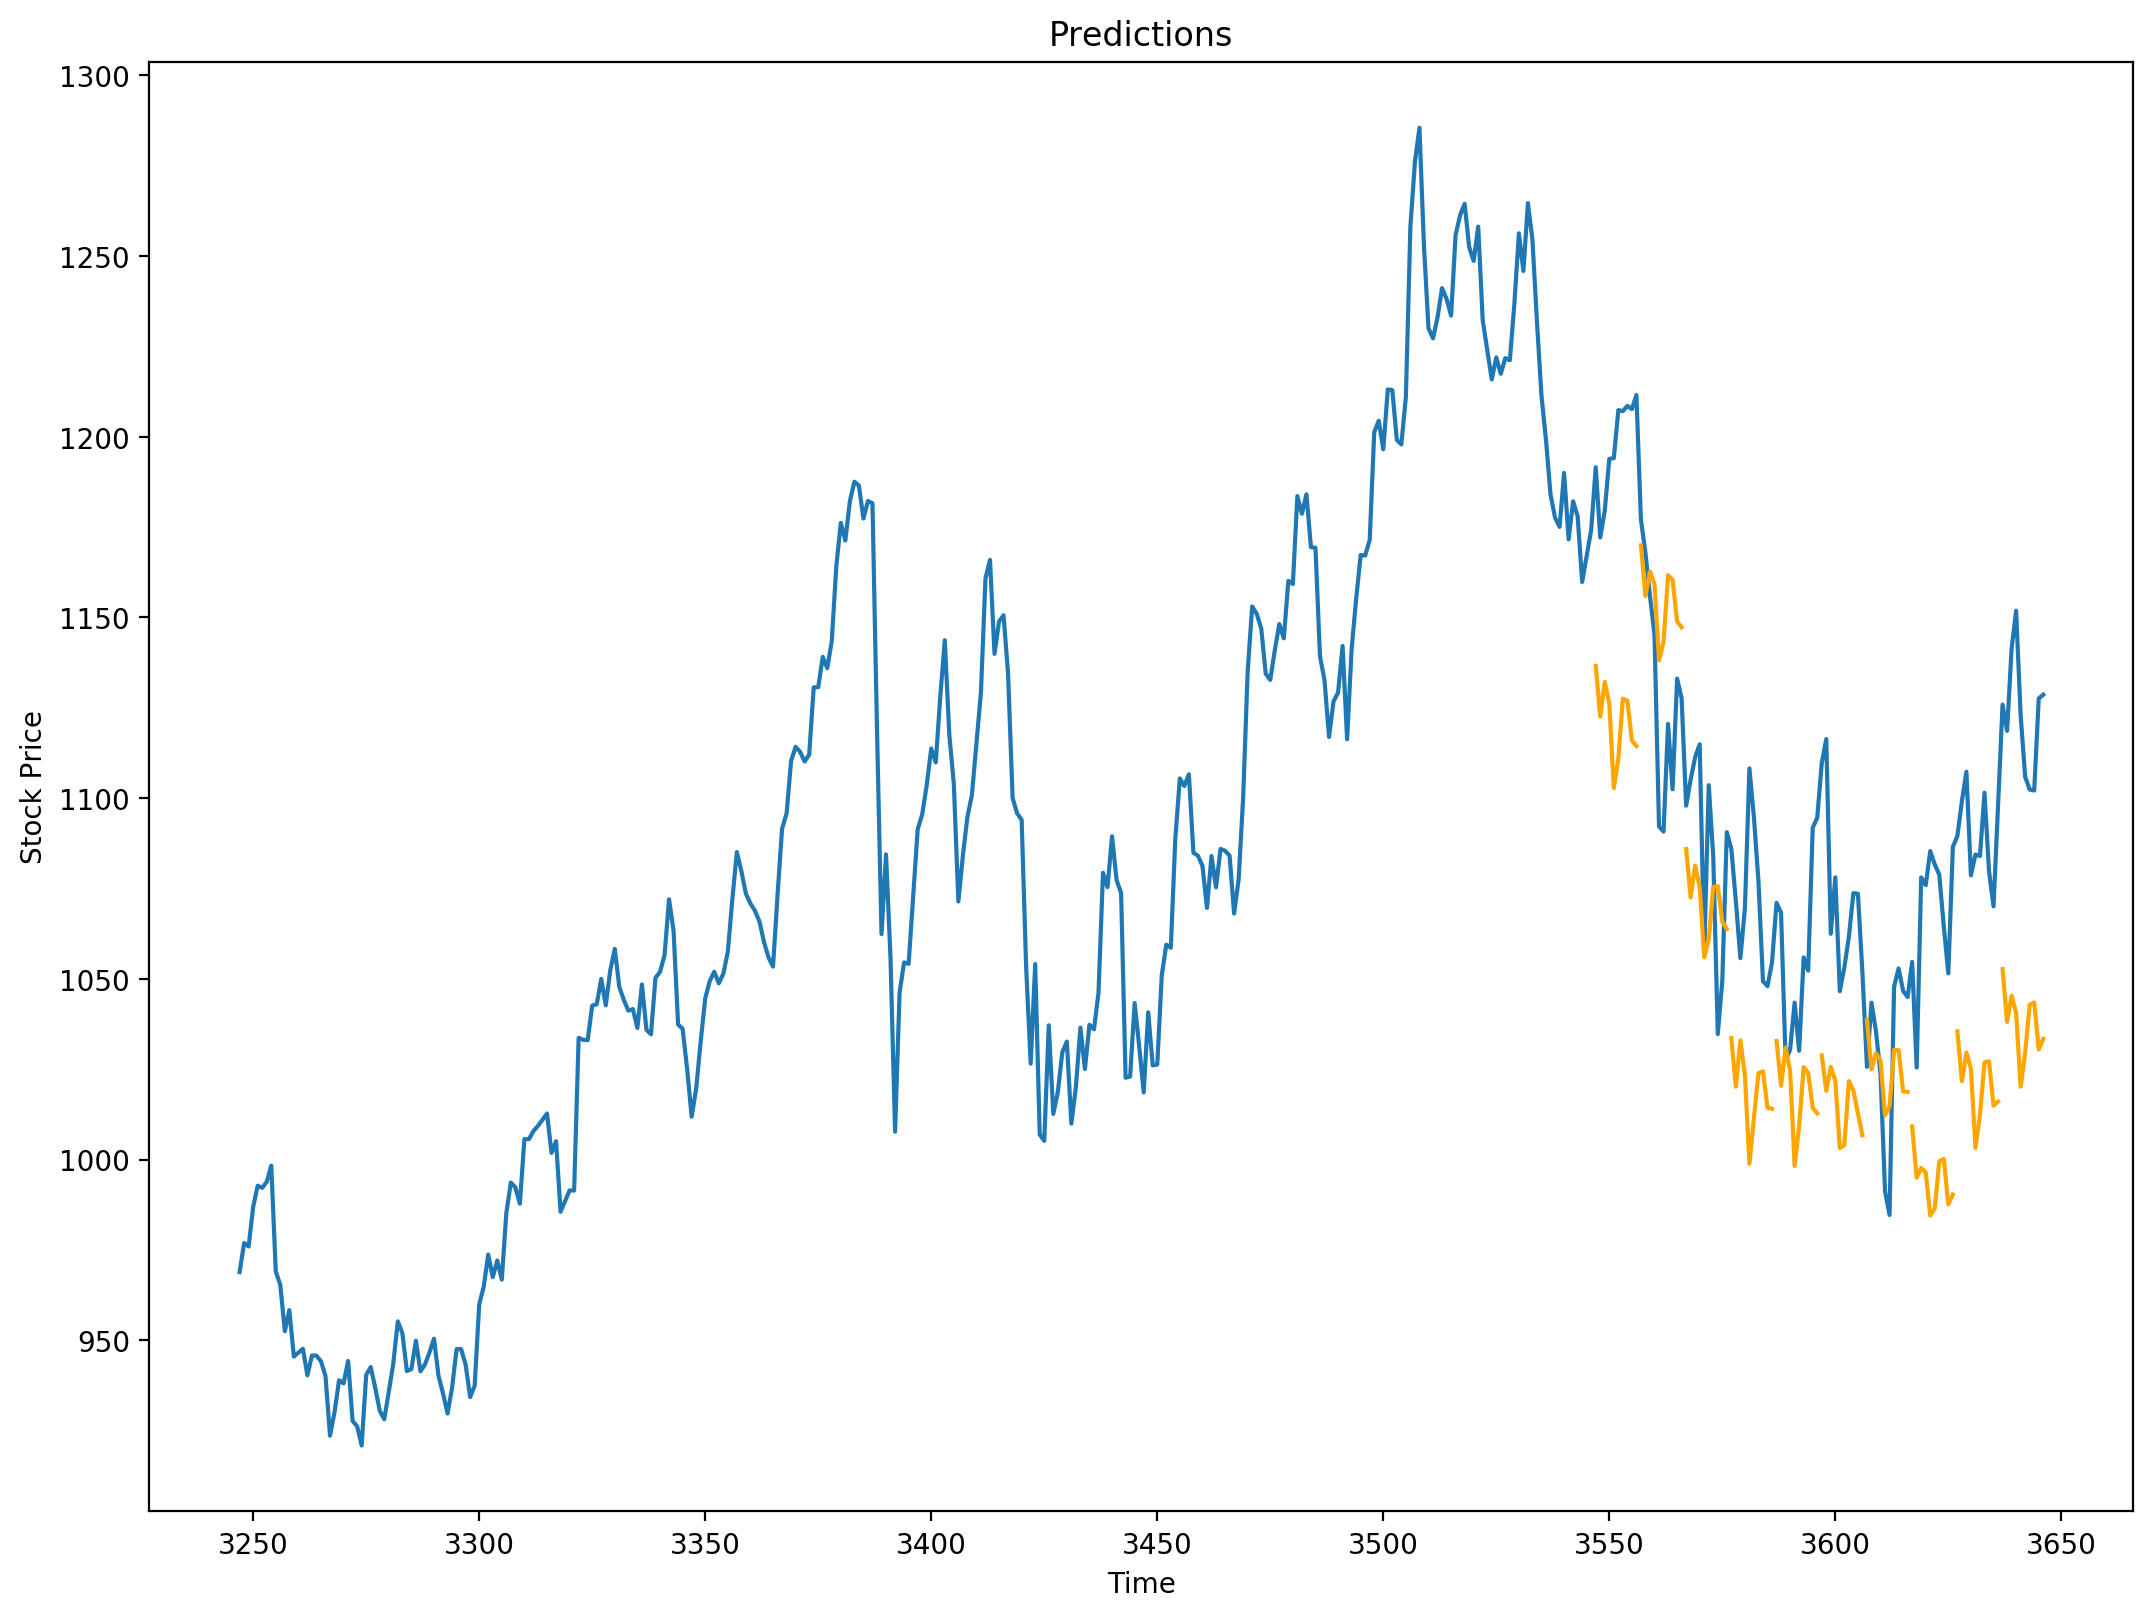

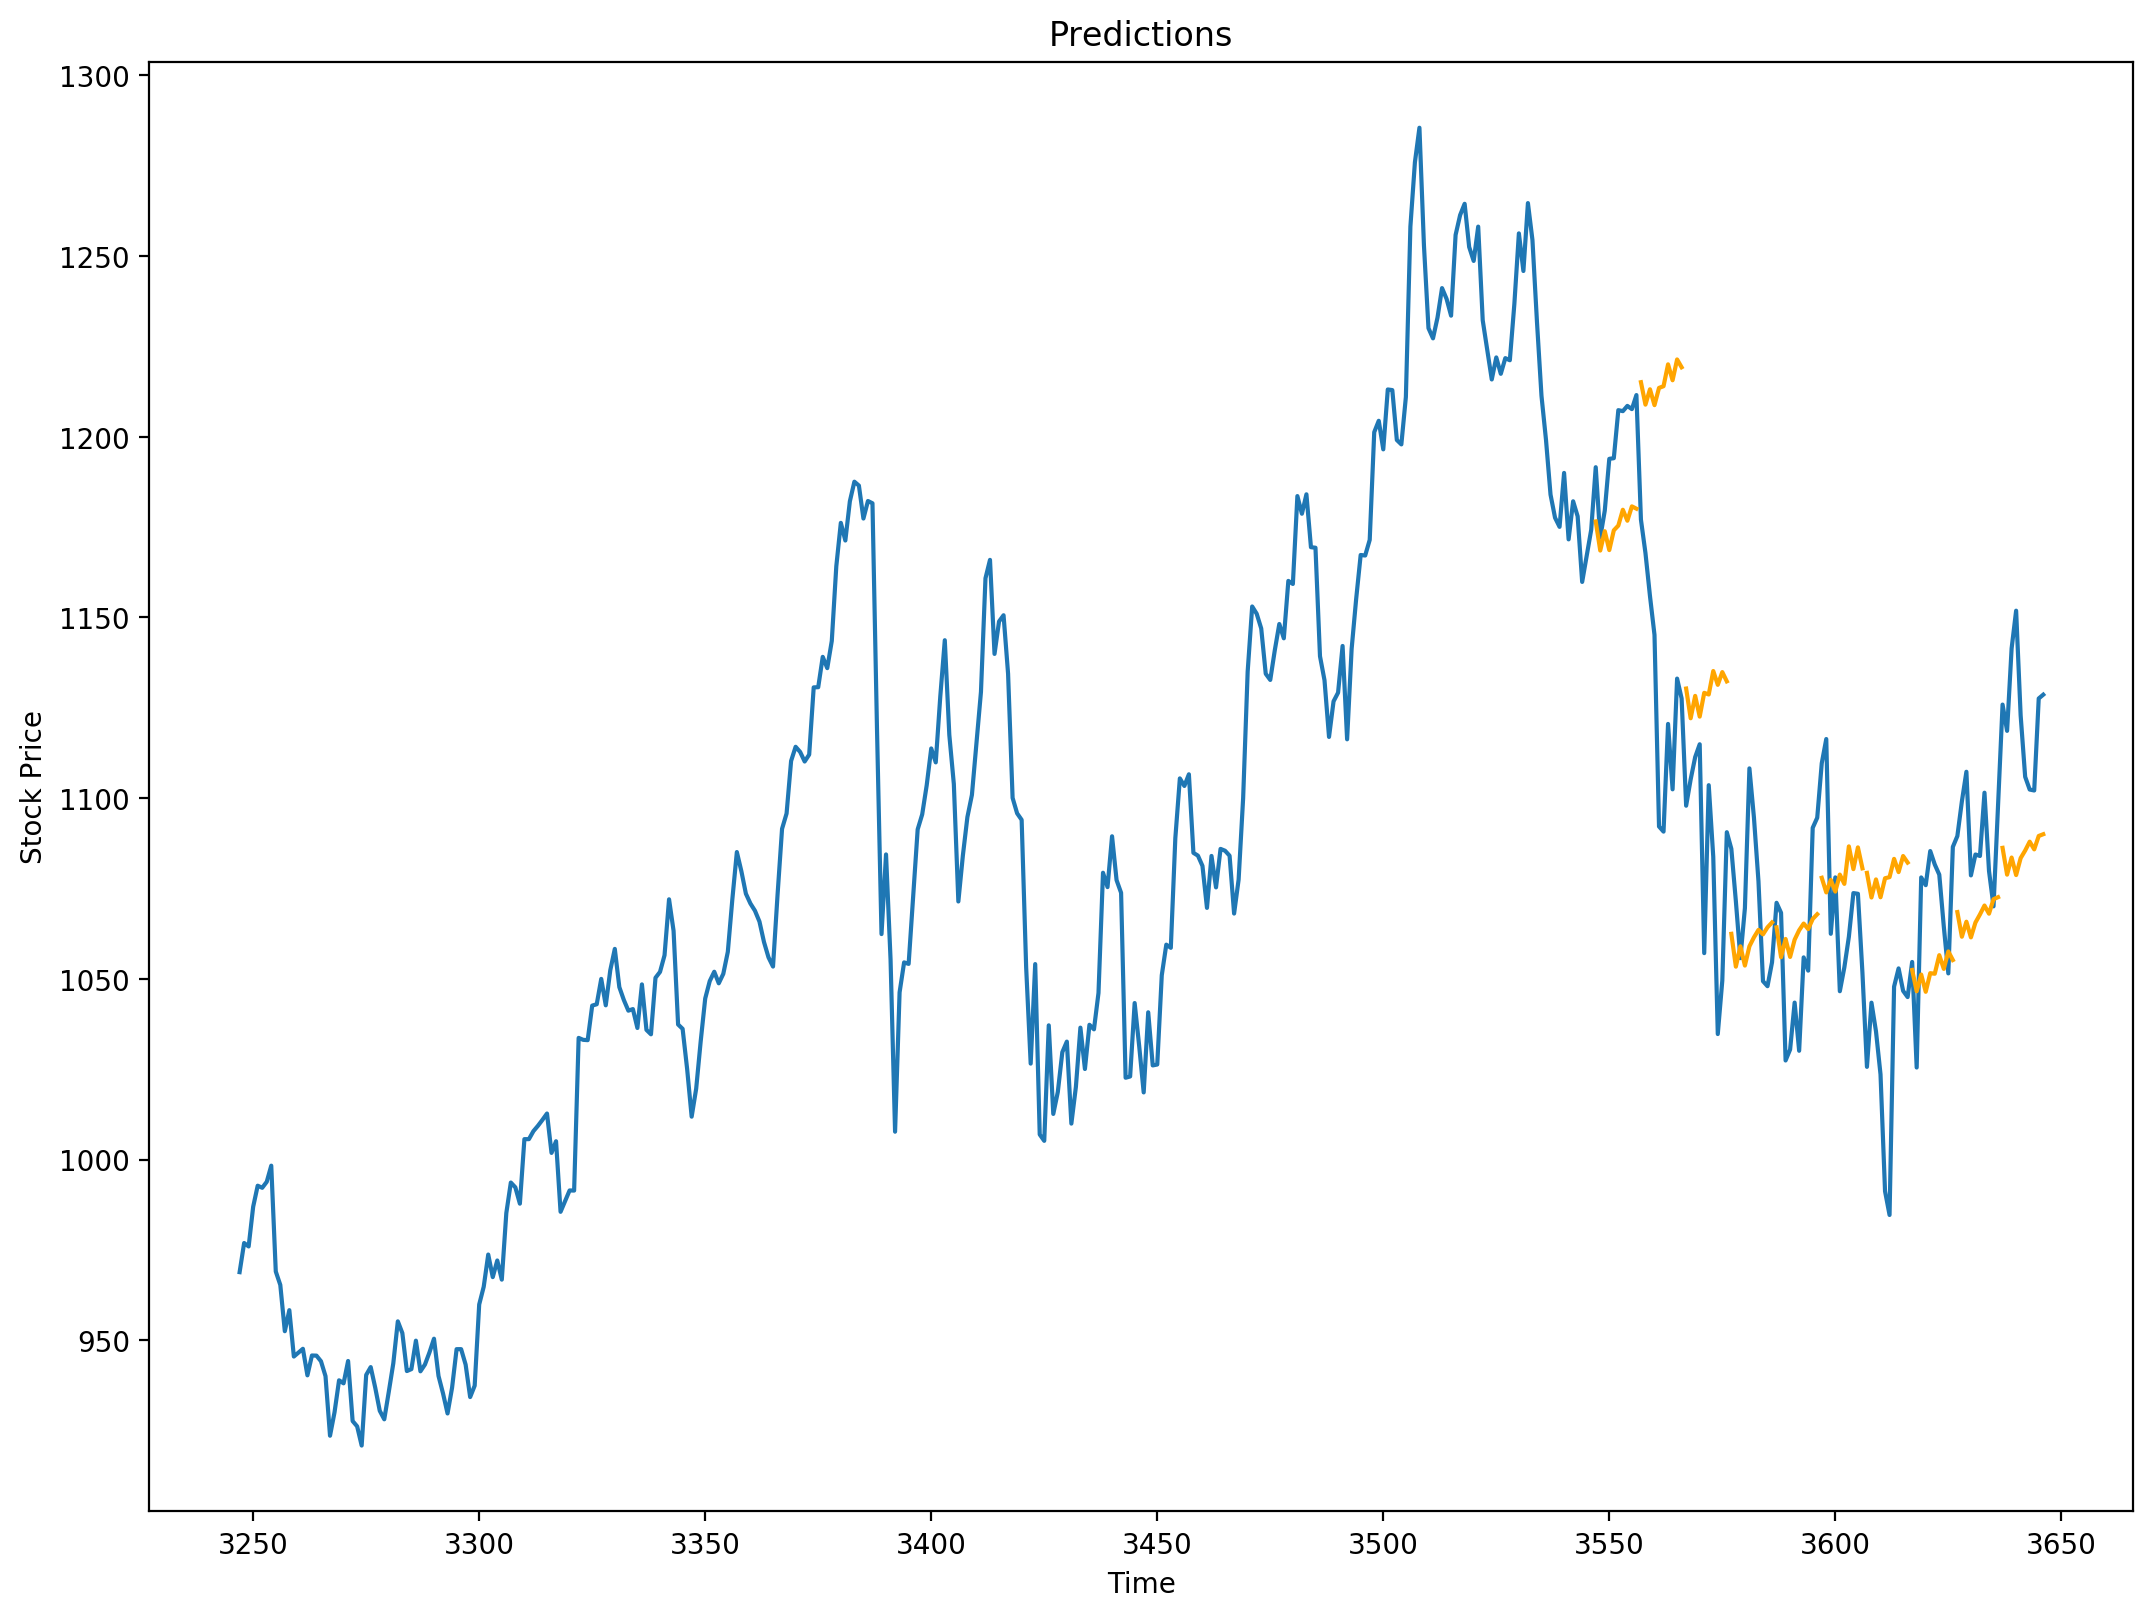

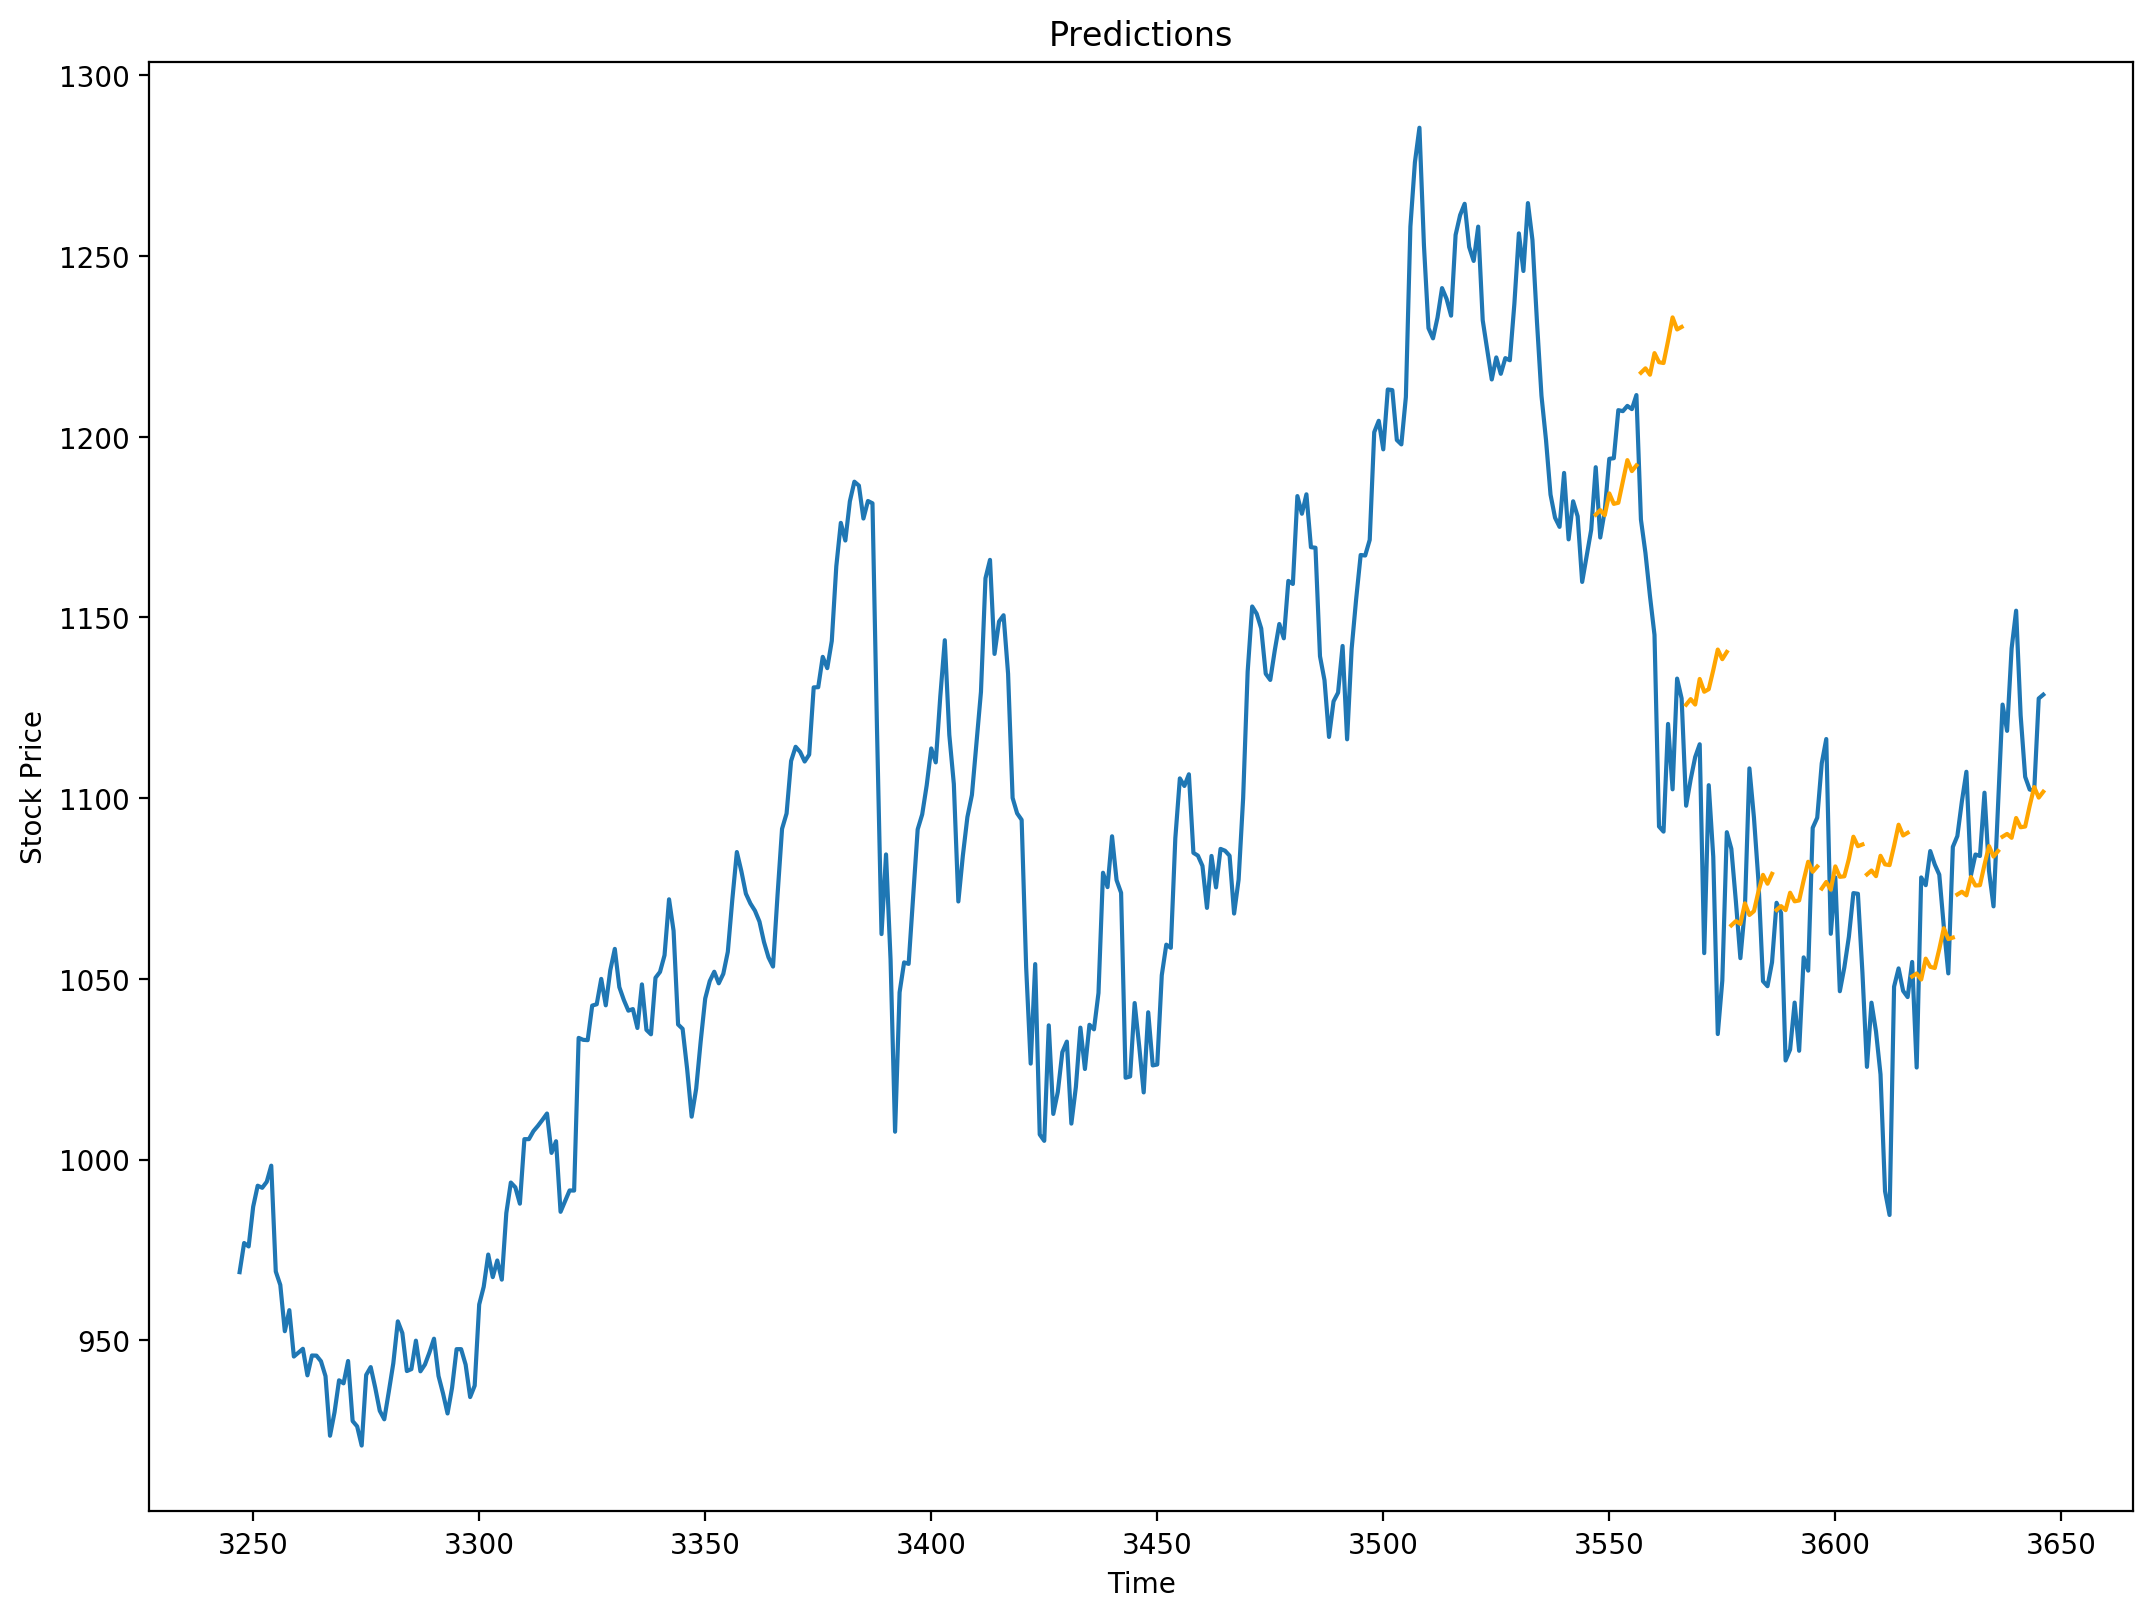

In [12]:
for model in models:
    xs, ys = build_dataset(model.input_options, model.model_options["predict_n"], True)
    
    x_test = np.array([xs[-(i + 1)] for i in range(0, 100, 10)])
    y_test = np.array([ys[-(i + 1)] for i in range(0, 100, 10)])
    
    y_predict = model.predict(x_test)
    
    plt.figure(figsize=(12.8, 9.6), dpi=200)
    
    plt.plot(
        np.arange(stock_prices.shape[0] - 400, stock_prices.shape[0]),
        stock_prices[-400:]
    )
    
    for i in range(y_predict.shape[0]):
        plt.plot(
            np.arange(stock_prices.shape[0] - (i + 1) * 10, stock_prices.shape[0] - i * 10),
            y_predict[i],
            color="orange"
        )
    
    plt.title("Predictions")
    plt.ylabel("Stock Price")
    plt.xlabel("Time")
    
    errors.append(mean_squared_error(y_test, y_predict, multioutput="raw_values").tolist())

errors = np.array(errors)

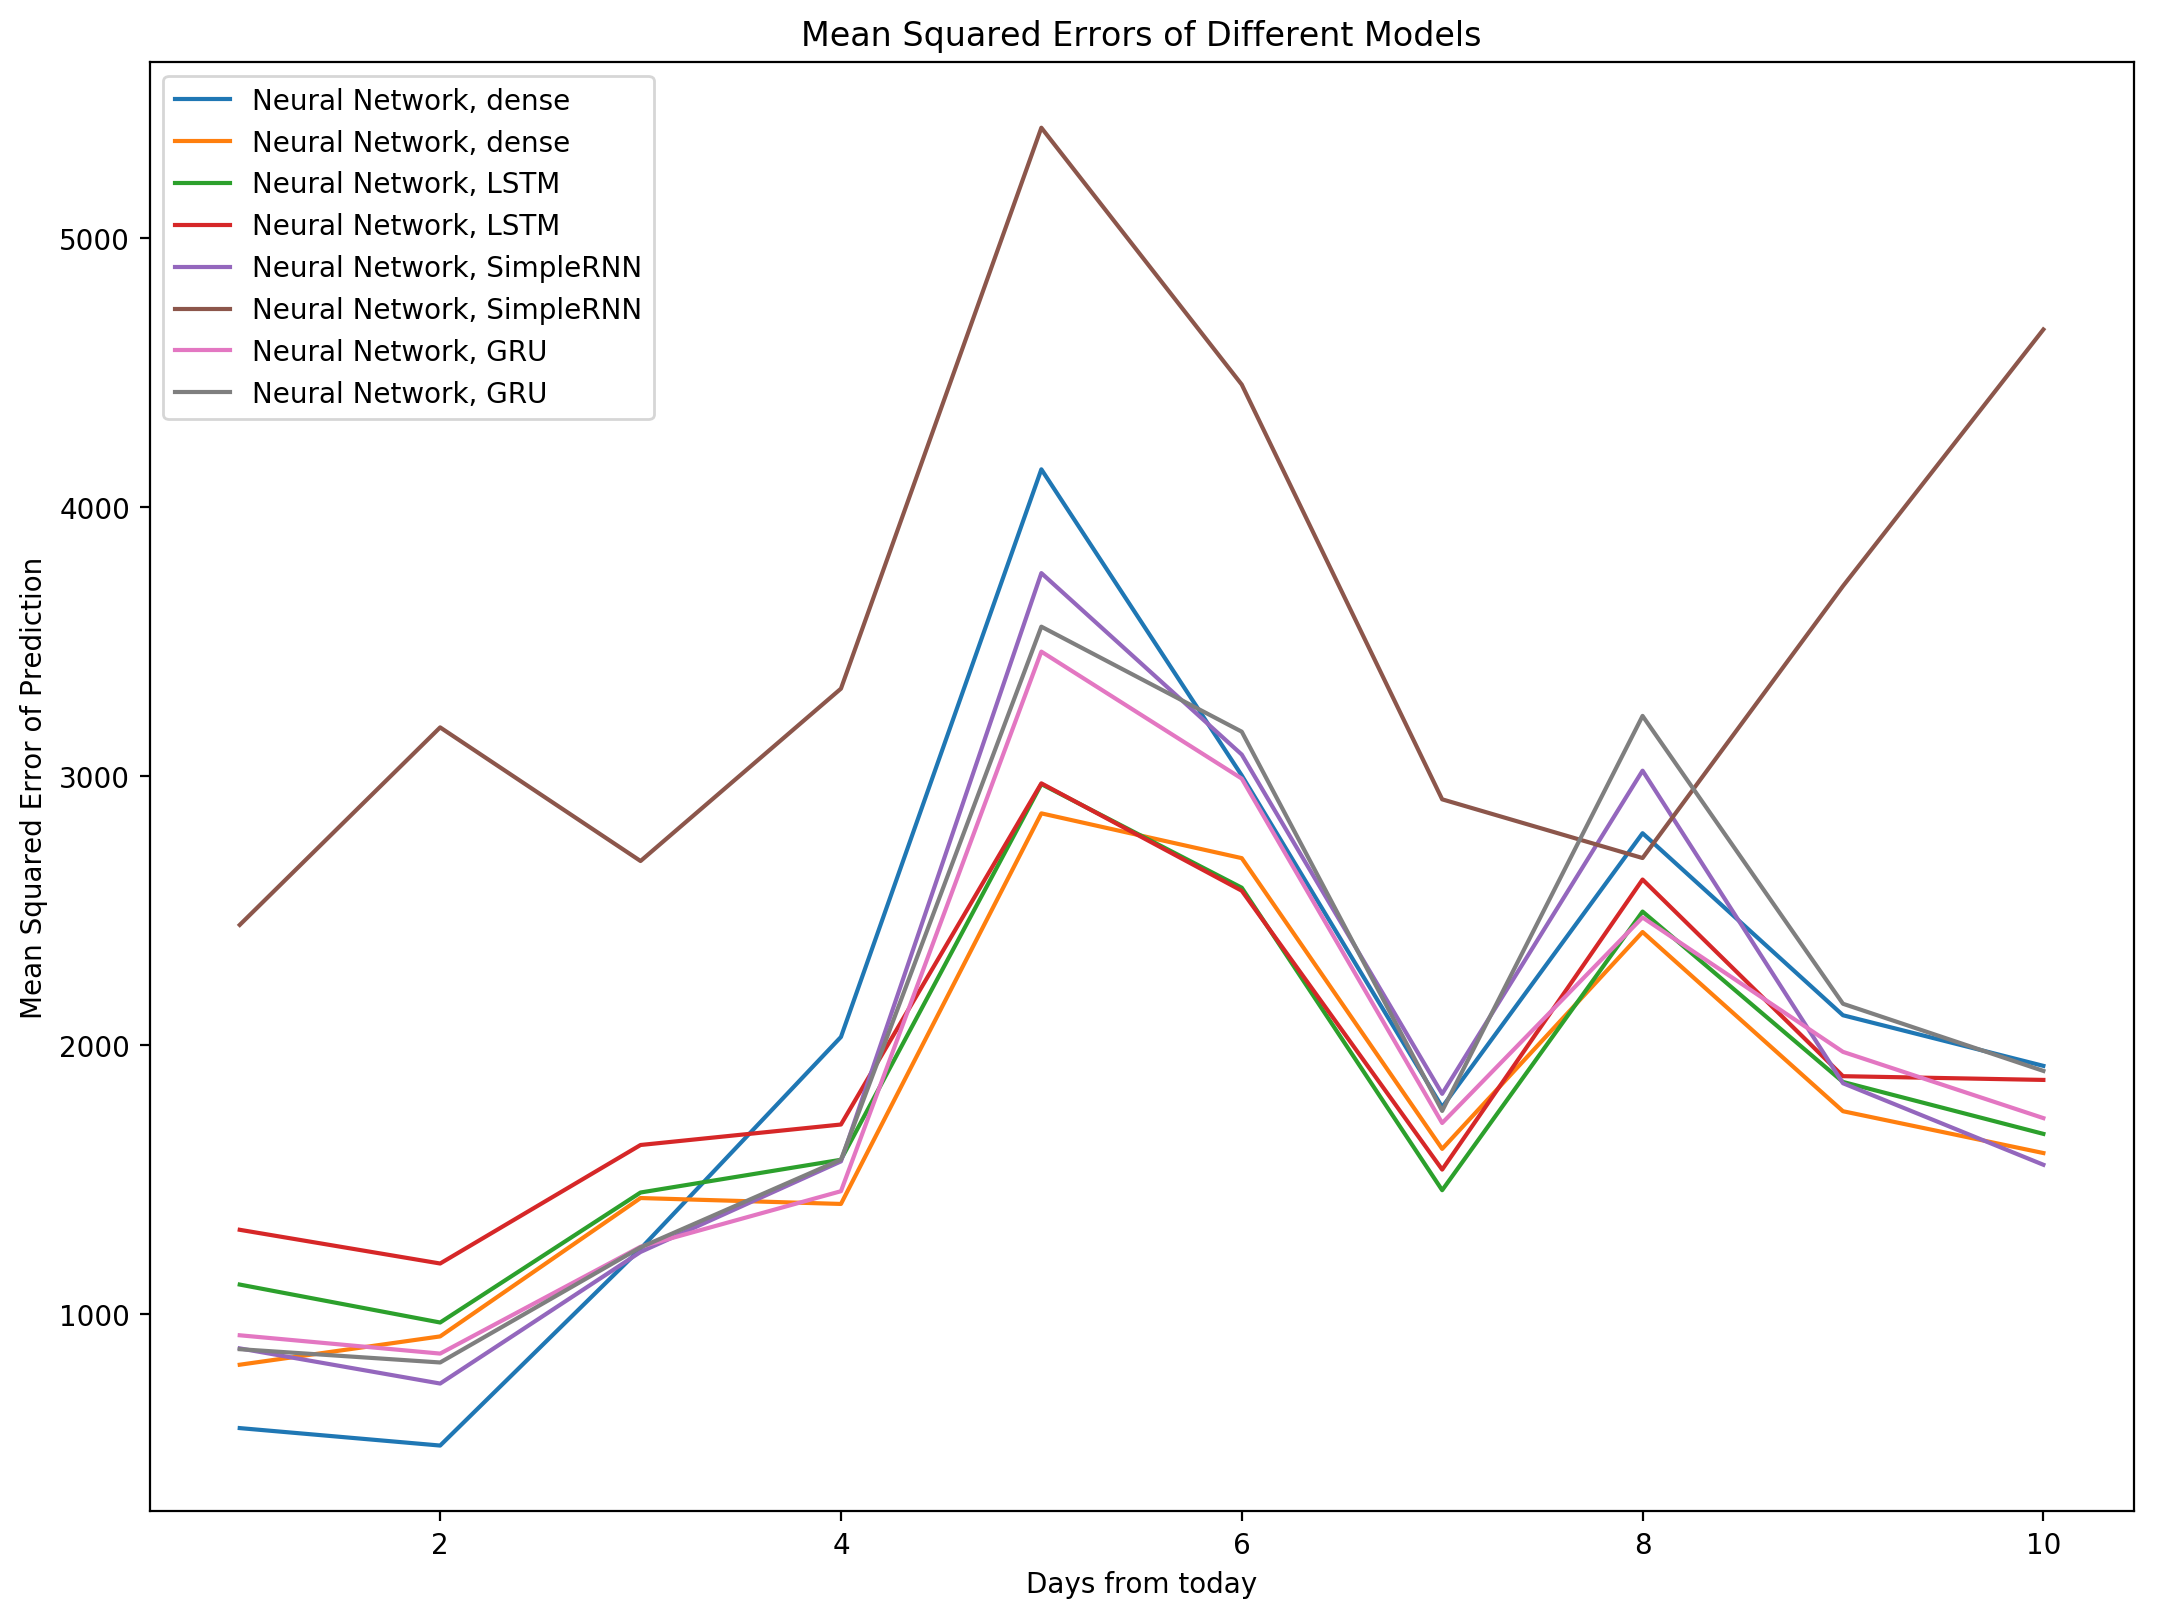

In [13]:
plt.figure(figsize=(12.8, 9.6), dpi=200)

for i in range(errors.shape[0]):
    plt.plot(
        np.arange(1, 11),
        errors[i],
        label=models[i].get_model_display_name()
    )

plt.title("Mean Squared Errors of Different Models")
plt.ylabel("Mean Squared Error of Prediction")
plt.xlabel("Days from today")
plt.legend()